___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
#!pip install scikit-plot

In [2]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_row', 200)
plt.rcParams["figure.figsize"] = (8,5)

import plotly.express as px
from ipywidgets import interact

# column transform and encoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import average_precision_score, roc_auc_score

# SVC Library
from sklearn.svm import SVC
from sklearn.metrics import make_scorer


# RF library
from sklearn.ensemble import RandomForestClassifier


# # yellowbrick library for visualizing the model performance
# from yellowbrick.classifier import ConfusionMatrix
# from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_f = pd.read_csv("ANSUR II FEMALE Public.csv")
df_m = pd.read_csv("ANSUR II MALE Public.csv",encoding = "ISO-8859-1")

## Explore Data

In [4]:
print(df_f.shape)
df_f.sample(5)

(1986, 108)


,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
1043,23990,216,1265,286,192,1166,215,167,337,283,267,429,61,307,282,143,965,219,783,539,452,338,1307,247,948,245,1100,738,546,294,30,58,17,243,704,88,228,306,248,465,408,977,71,175,162,153,539,175,274,61,341,379,932,590,330,349,412,475,442,58,380,108,316,370,1227,100,363,232,975,305,110,795,746,516,1562,1533,1247,974,572,157,700,405,133,803,1480,397,292,881,206,356,898,570,147,758,Female,14-Oct-11,Fort Bragg,Regular Army,Combat Support,68A,Philippines,6,Filipino,4,35,61,126,Right hand
1142,25282,201,1464,321,208,1364,245,199,363,314,282,450,69,324,313,126,1006,206,894,611,515,375,1513,277,1057,286,1288,847,639,334,34,63,18,303,837,98,268,324,271,464,458,1107,76,188,188,137,570,201,324,67,363,388,1067,645,420,440,485,547,502,71,390,116,323,378,1401,112,433,243,1034,338,131,947,850,565,1703,1764,1434,1133,581,162,761,469,124,916,1667,455,301,805,191,410,1034,740,157,901,Female,4-Nov-11,Fort Gordon,Regular Army,Combat Service Support,25A,Arizona,1,NaN,1,36,70,158,Right hand
1862,29021,208,1379,307,225,1288,239,183,382,306,283,441,69,295,273,134,1035,216,809,580,475,372,1445,264,900,240,1206,793,650,355,34,64,24,274,794,92,247,311,260,468,439,1002,79,185,180,147,566,191,312,71,366,410,1004,565,375,400,456,518,482,61,388,116,326,368,1341,106,407,244,1018,328,141,917,811,545,1648,1690,1383,1072,631,167,739,452,131,823,1611,442,275,783,177,357,1012,667,162,836,Female,21-Mar-12,Camp Shelby,Army National Guard,Combat Support,68W,Japan,1,NaN,1,22,67,146,Right hand
331,16143,216,1297,294,218,1204,218,171,337,291,247,416,65,306,277,137,944,230,801,548,446,350,1333,245,867,221,1121,733,604,360,30,60,20,251,733,93,232,296,247,464,409,995,76,181,164,153,564,187,296,68,317,375,925,625,364,371,410,473,423,67,371,108,329,364,1265,103,365,232,952,319,117,854,740,518,1533,1583,1269,1022,565,165,729,405,143,810,1520,395,283,811,198,355,935,565,146,778,Female,22-Apr-11,Fort Drum,Regular Army,Combat Support,92A,North Carolina,63,Filipino Puerto Rican,6,28,62,132,Right hand
1329,25761,217,1228,283,224,1121,227,164,345,288,244,423,66,296,267,129,982,217,767,561,470,358,1294,246,918,257,1076,684,628,343,31,61,22,229,700,88,219,286,251,440,390,962,72,174,160,148,538,178,287

In [5]:
print(df_m.shape)
df_m.sample(5)

(4082, 108)


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
2902,26965,298,1504,345,249,1372,273,218,447,440,288,598,80,355,343,152,1142,304,960,677,541,427,1570,322,1237,295,1335,890,627,328,35,60,17,247,790,110,290,357,364,654,506,1186,91,220,212,159,604,207,379,85,389,406,1117,725,513,515,515,588,523,75,448,128,420,463,1426,125,461,290,1340,373,157,920,923,611,1907,1820,1493,1185,713,200,852,496,136,984,1769,494,359,1094,293,385,1090,1147,185,887,Male,15-Dec-11,Fort Gordon,Regular Army,Combat Service Support,35F,Ohio,2,NaN,2,40,72,247,Right hand
2686,25141,336,1520,345,254,1386,282,212,484,398,306,593,72,363,352,148,1172,293,909,651,531,440,1598,336,1278,289,1349,870,678,380,34,66,24,276,837,115,289,352,342,676,496,1166,94,237,208,158,600,209,380,77,382,435,1078,620,515,521,524,582,514,77,470,138,472,513,1444,127,444,266,1345,375,165,974,952,608,1872,1836,1501,1179,742,198,826,486,140,929,1875,564,380,1186,320,424,1075,1201,195,917,Male,27-Oct-11,Fort Bragg,Regular Army,Combat Service Support,88M,Puerto Rico,1,NaN,1,37,74,257,Right hand
1738,16175,239,1365,338,216,1251,237,183,421,337,268,500,68,318,308,147,1018,249,836,605,492,374,1446,288,1072,259,1207,813,593,363,32,65,23,192,771,100,258,338,268,540,466,1091,87,207,190,154,560,194,326,78,353,384,986,615,422,466,458,523,466,64,387,120,376,434,1382,120,409,265,1136,364,173,885,904,595,1821,1683,1382,1048,605,158,801,443,133,852,1590,455,341,1017,248,401,997,786,158,770,Male,25-Apr-11,Fort Drum,Regular Army,Combat Service Support,42A,Texas,63,Filipino Mexican,4,41,67,170,Right hand
3094,27373,286,1518,353,270,1390,272,222,432,395,308,531,87,336,333,149,1098,267,922,652,532,437,1603,312,1109,259,1378,896,646,364,41,70,23,275,874,107,293,364,333,616,500,1204,98,236,203,160,590,203,369,76,374,399,1095,630,405,435,504,580,511,75,457,134,424,461,1491,121,453,285,1196,383,155,988,956,635,1894,1863,1523,1198,676,200,827,488,139,951,1758,517,356,1018,264,411,1107,1033,198,895,Male,12-Dec-11,Fort Gordon,Regular Army,Combat Support,91B,Idaho,1,NaN,1,23,74,230,Right hand
954,14096,305,1557,349,232,1415,249,203,441,401,303,556,78,355,326,149,1104,282,930,652,530,405,1632,315,1213,309,1373,896,742,415,37,66,29,278,850,103,273,374,348,676,496,1222,89,214,194,162,599,

In [6]:
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,1986.0,229.651057,31.464691,155.0,207.00,227.0,249.00,358.0
acromialheight,1986.0,1335.095166,58.079885,1115.0,1298.00,1332.0,1374.00,1536.0
acromionradialelength,1986.0,311.198389,17.164691,249.0,300.00,311.0,323.00,371.0
anklecircumference,1986.0,215.739678,14.891757,170.0,205.00,215.0,225.00,275.0
axillaheight,1986.0,1239.029708,55.801958,1038.0,1202.00,1236.0,1277.00,1419.0
balloffootcircumference,1986.0,228.110272,11.771007,194.0,220.00,227.0,236.00,270.0
balloffootlength,1986.0,182.051360,9.641920,151.0,175.00,182.0,188.00,216.0
biacromialbreadth,1986.0,365.348943,18.298851,283.0,353.00,365.0,378.00,422.0
bicepscircumferenceflexed,1986.0,305.578550,30.757033,216.0,285.00,304.0,324.00,435.0


In [7]:
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,4082.0,254.650906,37.327178,163.0,227.00,251.0,279.00,451.0
acromialheight,4082.0,1440.736894,63.287242,1194.0,1398.00,1439.0,1481.00,1683.0
acromionradialelength,4082.0,335.244488,17.482795,270.0,324.00,335.0,346.00,393.0
anklecircumference,4082.0,229.343949,14.649102,156.0,219.25,228.0,239.00,293.0
axillaheight,4082.0,1329.082068,59.516123,1106.0,1289.00,1328.0,1367.00,1553.0
balloffootcircumference,4082.0,252.017148,12.936131,186.0,243.00,252.0,261.00,306.0
balloffootlength,4082.0,200.935081,10.470947,156.0,194.00,201.0,208.00,245.0
biacromialbreadth,4082.0,415.675649,19.161654,337.0,403.00,415.0,428.00,489.0
bicepscircumferenceflexed,4082.0,358.135718,34.618093,246.0,335.00,357.0,380.00,490.0


In [8]:
# All columns are same
df_f.columns.str.lower() == df_m.columns.str.lower()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
# First column is different
df_f.columns== df_m.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
print(df_f.columns[0])
print(df_m.columns[0])

SubjectId
subjectid


In [11]:
df_f.rename(columns = {'SubjectId':'subjectid'}, inplace = True)

In [12]:
df0 = pd.concat([df_f,df_m], axis=0, ignore_index=True)
df = df0.copy()
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [13]:
df.shape

(6068, 108)

In [14]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [15]:
null_columns = {}
for column in df.columns:
    if df[column].isna().sum() > 0 :
        null_columns[column] = df[column].isna().sum()
null_columns

{'Ethnicity': 4647}

In [16]:
df_object = df.select_dtypes(include="object")
df_object

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,Blackfoot Cherokee Choctaw,Right hand
6064,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,NaN,Right hand
6065,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,NaN,Right hand
6066,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,NaN,Right hand


In [17]:
df.select_dtypes(include="object")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,Blackfoot Cherokee Choctaw,Right hand
6064,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,NaN,Right hand
6065,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,NaN,Right hand
6066,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,NaN,Right hand


In [18]:
df.describe(include="object").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [19]:
df.select_dtypes(exclude="object")

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,2,2,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,3,3,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,1,1,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,8,2,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,1,1,45,63,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [20]:
def color_corr(val):
    if val == 1:
        color = "green"
    elif val > 0.9:
        color = 'red'
    elif val > 0.8:
        color = 'blue'    
    else:
        color = 'black'
    return 'color: %s' % color
df_corr = df.corr() 
df_corr.style.applymap(color_corr)

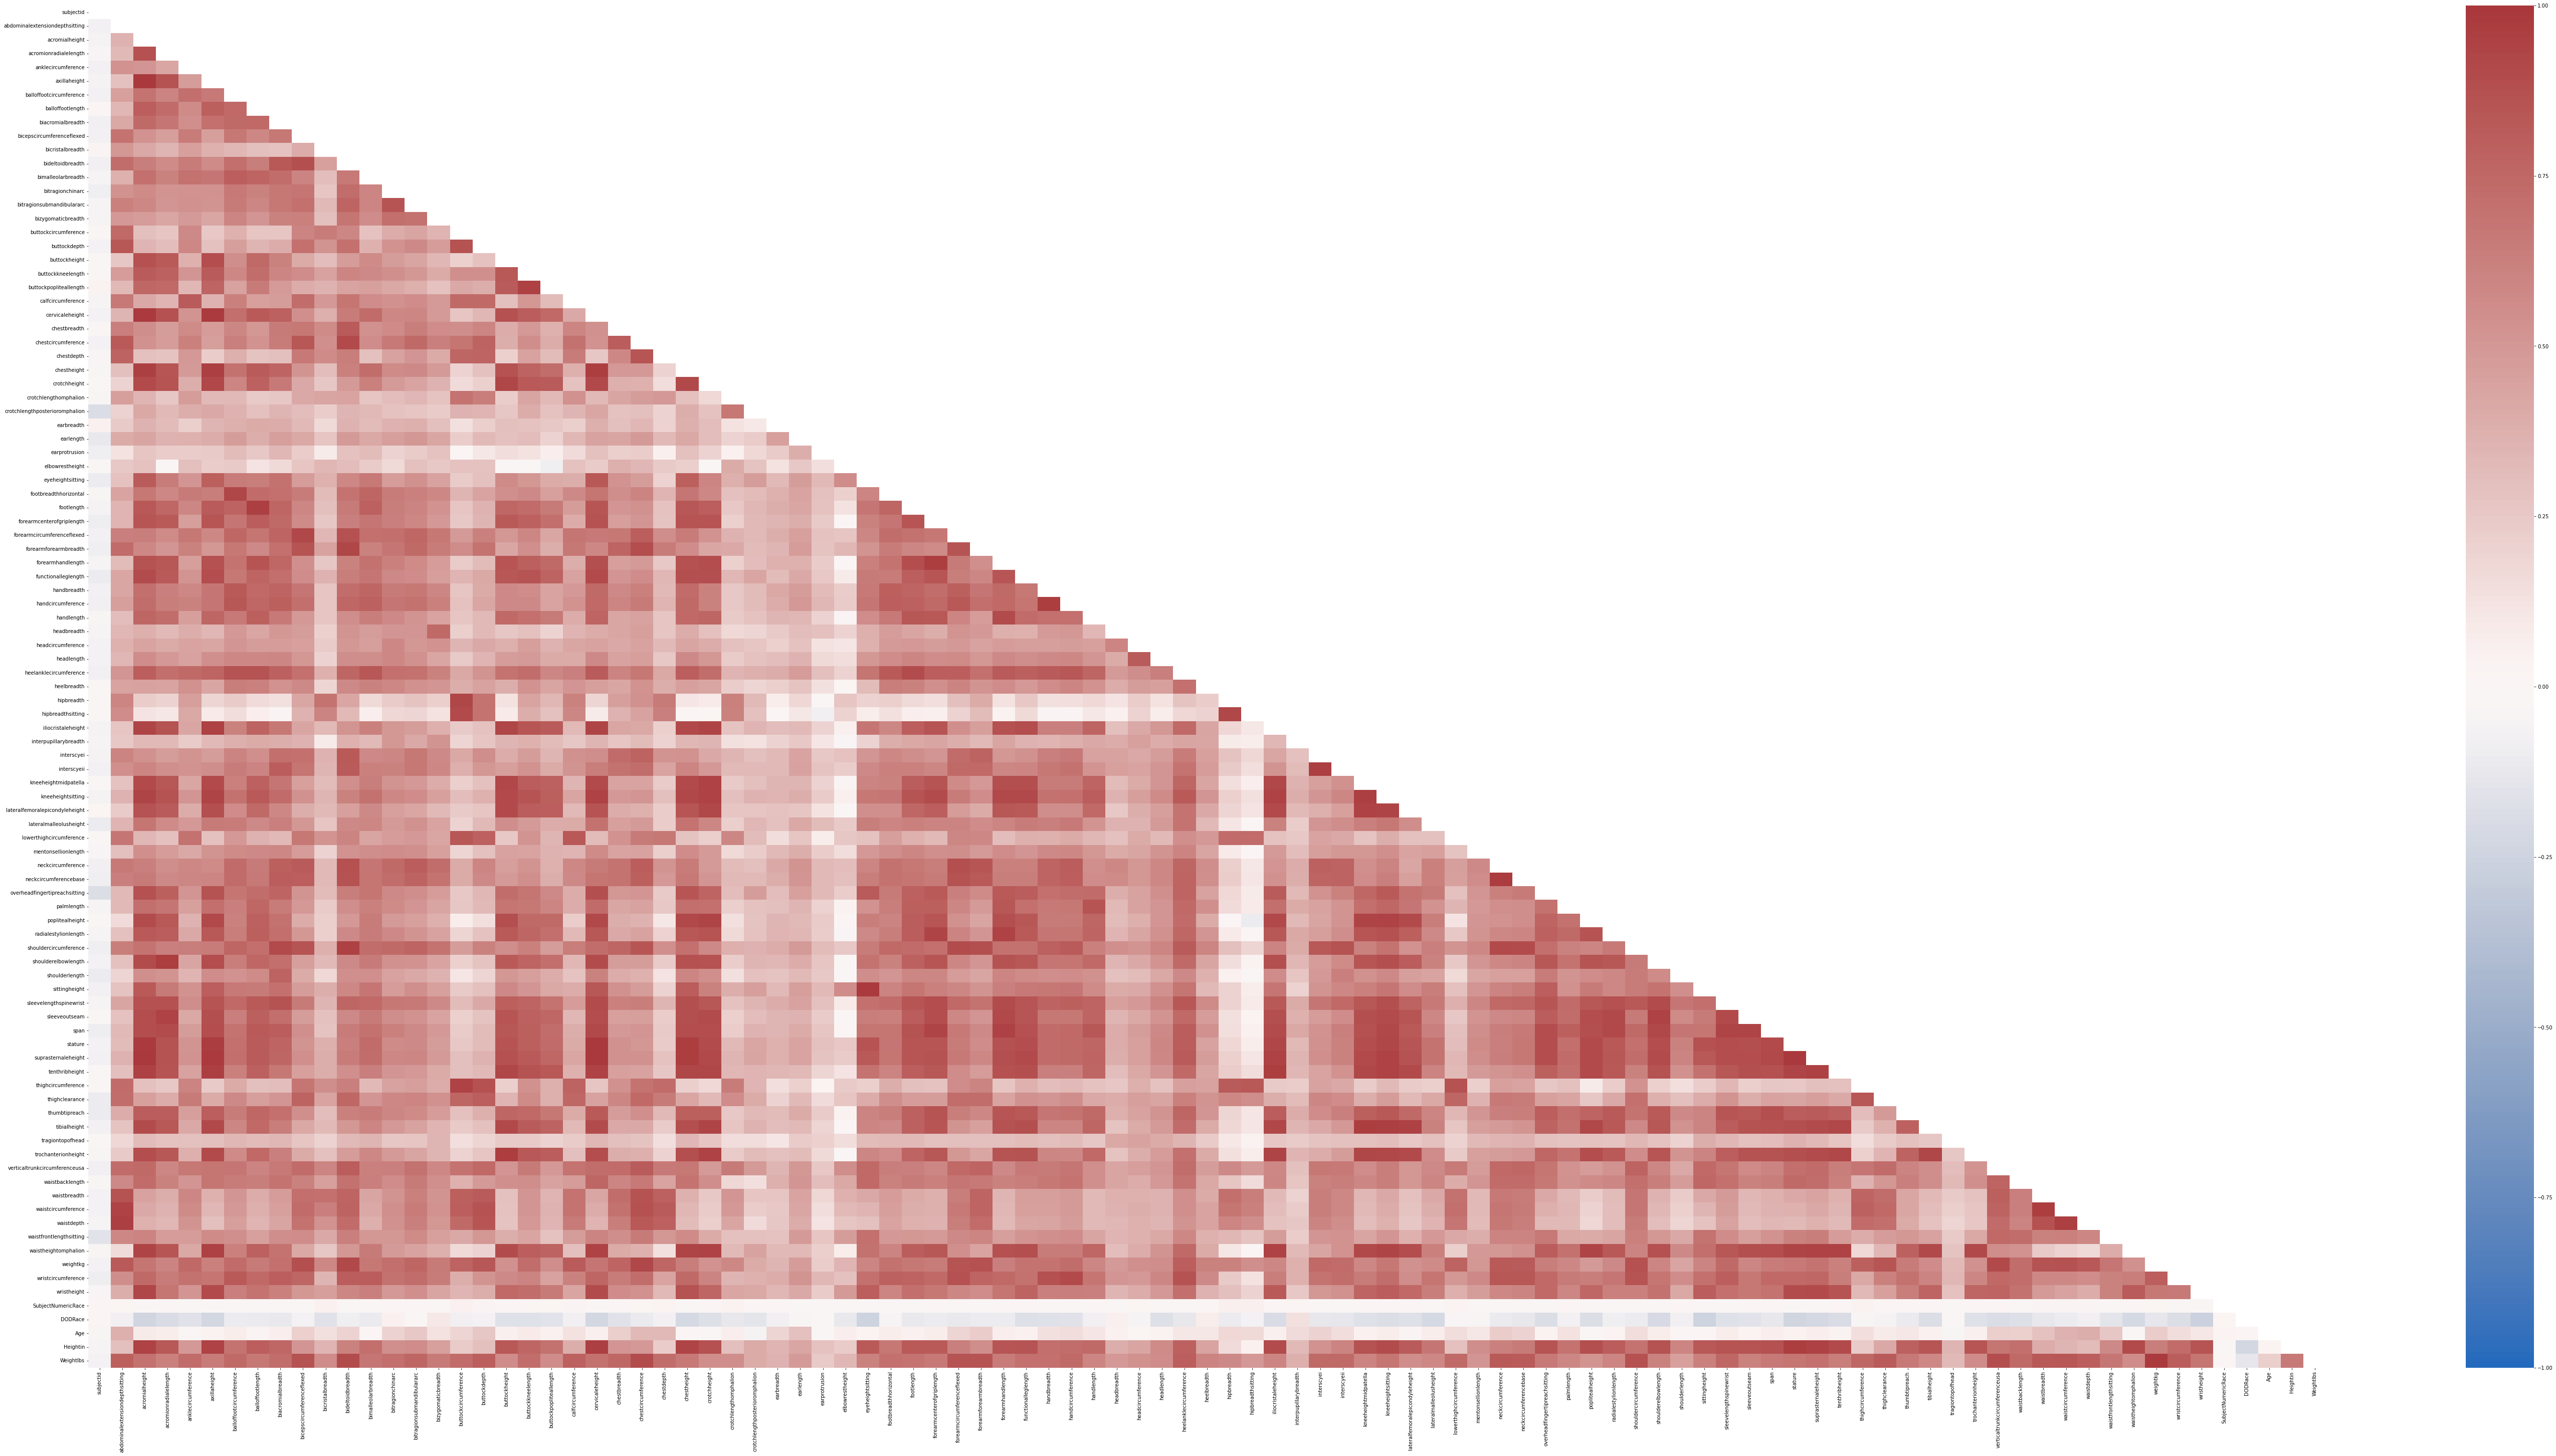

In [21]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(100,50))
sns.heatmap(df.corr(), cmap="vlag",  mask=mask, vmin=-1, vmax=1);

In [22]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

**Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)**

In [23]:
df = df[(df.DODRace == 1) |  (df.DODRace == 2) | (df.DODRace == 3) ]

In [24]:
df.reset_index(drop=True, inplace=True)
df.shape

(5769, 108)

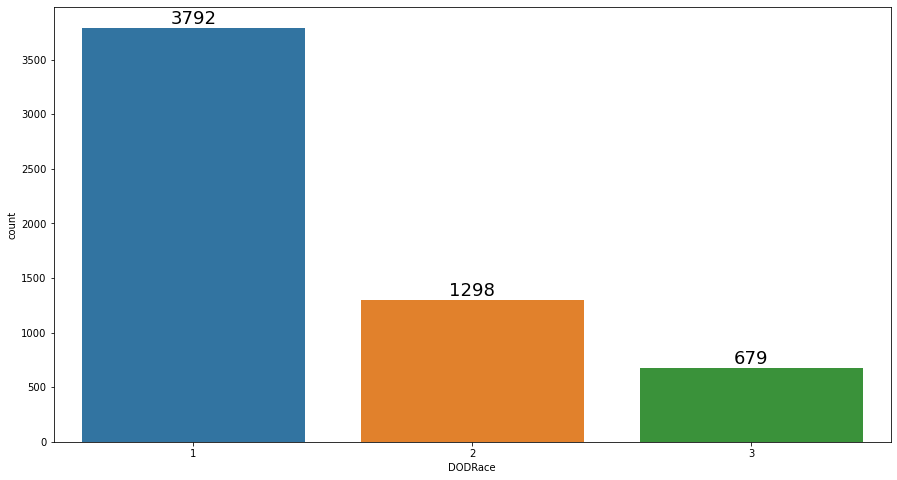

In [25]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df.DODRace)
for i in ax.containers:
    ax.bar_label(i, size=18)

**It looks like the data is not balanced. We will create a model and examine the scores.**

In [26]:
race_corr = {}
for i in df.select_dtypes(exclude="object") :
    if df.DODRace.corr(df[i]) > 0.9 :
        race_corr["Race Corr with "+ i] = df.DODRace.corr(df[i])
race_corr

{'Race Corr with DODRace': 1.0}

In [27]:
df.DODRace = df.DODRace.astype(object)

In [28]:
def scatter(feature1, feature2):
    fig = px.scatter(df, feature1, feature2, color="DODRace",
                       marginal_x="rug", marginal_y="box")
    fig.show()

In [29]:
cols = df.select_dtypes(exclude="object").columns
interact(scatter, feature1= cols, feature2 = cols)

interactive(children=(Dropdown(description='feature1', options=('subjectid', 'abdominalextensiondepthsitting',…

<function __main__.scatter(feature1, feature2)>

### subjectid
Random numbers whose subjectid values are assigned to subjects. We can drop them

In [30]:
df.drop("subjectid", axis=1, inplace=True)

### stature & weightkg
**Heightin – Height in Inches; self-reported, comparable to measured “stature”**

**Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”**

In [31]:
df[["stature", "Heightin"]]

,stature,Heightin
0,1560,61
1,1665,64
2,1711,68
3,1660,66
4,1572,63
...,...,...
5764,1688,67
5765,1765,71
5766,1690,67
5767,1718,69


In [32]:
# 1 inç equal to 25.4 mm
df.Heightin = df.Heightin.apply(lambda x : 25.4 * x)

In [33]:
df[["stature", "Heightin"]]

,stature,Heightin
0,1560,1549.4
1,1665,1625.6
2,1711,1727.2
3,1660,1676.4
4,1572,1600.2
...,...,...
5764,1688,1701.8
5765,1765,1803.4
5766,1690,1701.8
5767,1718,1752.6


           stature  Heightin
stature   1.000000  0.960839
Heightin  0.960839  1.000000


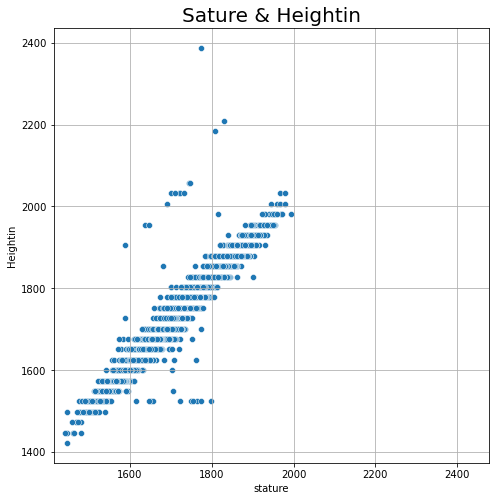

In [34]:
print(df[["stature", "Heightin"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "stature", y = "Heightin", data=df)
plt.axis('square')
plt.title("Sature & Heightin", size=20)
plt.grid();

There are cases where the "self-reported" measurement values are reported more than the measured values. Let's compare "self-reported" with another column that has a correlation to compare which data is correct.

In [35]:
heightin_corr = {}
for i in df.select_dtypes(exclude="object") :
    if df.Heightin.corr(df[i]) > 0.9 :
        race_corr["Heightin Corr with "+ i] = df.Heightin.corr(df[i])
race_corr

{'Race Corr with DODRace': 1.0,
 'Heightin Corr with acromialheight': 0.9438904388936643,
 'Heightin Corr with axillaheight': 0.938703913285129,
 'Heightin Corr with cervicaleheight': 0.9555891389190841,
 'Heightin Corr with chestheight': 0.9331745551496916,
 'Heightin Corr with stature': 0.9608390521093624,
 'Heightin Corr with suprasternaleheight': 0.9506182362231389,
 'Heightin Corr with waistheightomphalion': 0.9041518352338879,
 'Heightin Corr with Heightin': 1.0}

                acromialheight  Heightin
acromialheight         1.00000   0.94389
Heightin               0.94389   1.00000


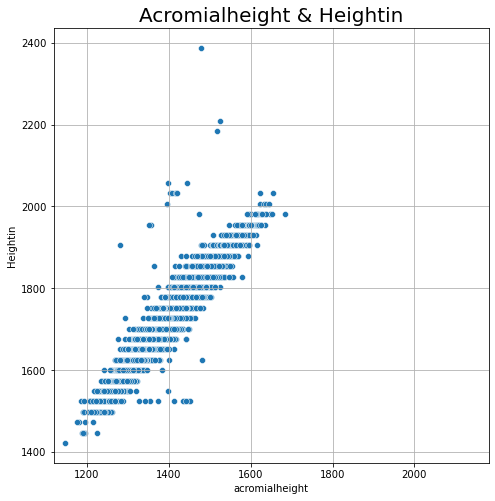

In [36]:
print(df[["acromialheight", "Heightin"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "acromialheight", y = "Heightin", data=df)
plt.axis('square')
plt.title("Acromialheight & Heightin", size=20)
plt.grid();

                 stature  acromialheight
stature         1.000000        0.979925
acromialheight  0.979925        1.000000


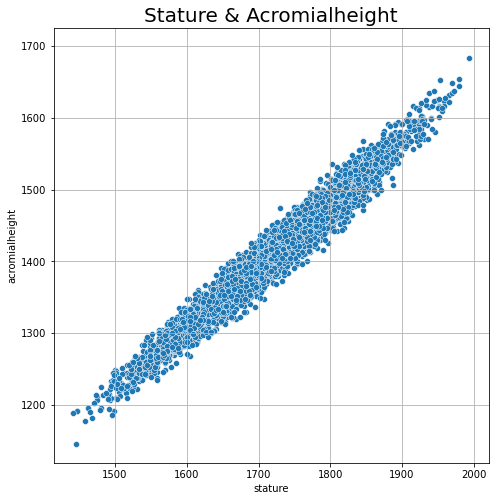

In [37]:
print(df[["stature", "acromialheight"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "stature", y = "acromialheight", data=df)
plt.axis('square')
plt.title("Stature & Acromialheight", size=20)
plt.grid();

While "acromialheight" measures show a smooth spread with Status and quite high deviations with self-reported "Heightin" measures.

It is observed that there are errors in the "Heightin" column. We can remove this column

In [38]:
df.drop("Heightin", axis=1, inplace=True)

### weightkg & Weightlbs

In [39]:
df[["weightkg", "Weightlbs"]]

,weightkg,Weightlbs
0,657,142
1,534,120
2,663,147
3,782,175
4,886,195
...,...,...
5764,675,160
5765,896,194
5766,832,186
5767,731,165


In [40]:
# 1 lbs = 0,45 kg
df.Weightlbs = df.Weightlbs.apply(lambda x : x * 0.45)
df.weightkg = df.weightkg.apply(lambda x : x / 10)

           weightkg  Weightlbs
weightkg   1.000000   0.977694
Weightlbs  0.977694   1.000000


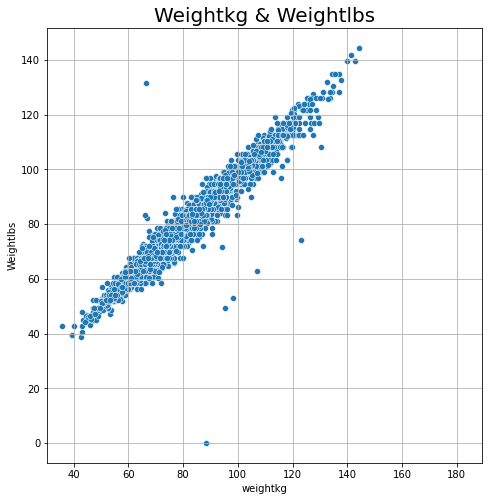

In [41]:
print(df[["weightkg", "Weightlbs"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "weightkg", y = "Weightlbs", data=df)
plt.axis('square')
plt.title("Weightkg & Weightlbs", size=20)
plt.grid();

In [42]:
weightlbs_corr = {}
for i in df.select_dtypes(exclude="object") :
    if df.Weightlbs.corr(df[i]) > 0.9 :
        race_corr["Weightlbs Corr with "+ i] = df.Weightlbs.corr(df[i])
race_corr

{'Race Corr with DODRace': 1.0,
 'Heightin Corr with acromialheight': 0.9438904388936643,
 'Heightin Corr with axillaheight': 0.938703913285129,
 'Heightin Corr with cervicaleheight': 0.9555891389190841,
 'Heightin Corr with chestheight': 0.9331745551496916,
 'Heightin Corr with stature': 0.9608390521093624,
 'Heightin Corr with suprasternaleheight': 0.9506182362231389,
 'Heightin Corr with waistheightomphalion': 0.9041518352338879,
 'Heightin Corr with Heightin': 1.0,
 'Weightlbs Corr with weightkg': 0.9776936102678871,
 'Weightlbs Corr with Weightlbs': 1.0}

                acromialheight  Weightlbs
acromialheight        1.000000   0.696038
Weightlbs             0.696038   1.000000


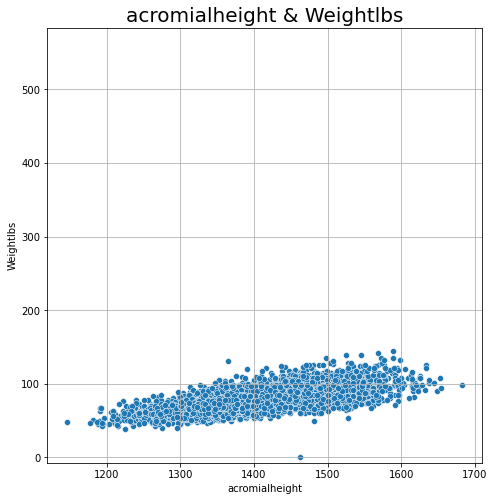

In [43]:
print(df[["acromialheight", "Weightlbs"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "acromialheight", y = "Weightlbs", data=df)
plt.axis('square')
plt.title("acromialheight & Weightlbs", size=20)
plt.grid();

                acromialheight  weightkg
acromialheight        1.000000  0.677768
weightkg              0.677768  1.000000


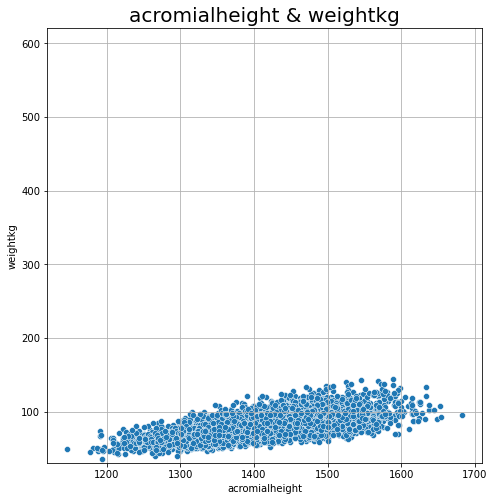

In [44]:
print(df[["acromialheight", "weightkg"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "acromialheight", y = "weightkg", data=df)
plt.axis('square')
plt.title("acromialheight & weightkg", size=20)
plt.grid();

The "acromialheight" column shows a relatively smooth spread with "weightkg".

Since "weightkg" and "Weightlbs" refer to the same measure, we can drop the "Weightlbs" column

In [45]:
df.drop("Weightlbs", axis=1, inplace=True)

### SubjectNumericRace
 subject’s self-reported race
 
 SubjectNumericRace and DODRace are columns that give the same information.

In [46]:
df.SubjectNumericRace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
42          6
62          6
231         6
35          5
235         4
63          3
43          3
218         3
431         2
423         2
2518        2
2351        2
451         1
4           1
238         1
358         1
318         1
651         1
425         1
42351       1
631         1
6           1
428         1
4251        1
Name: SubjectNumericRace, dtype: int64

In [47]:
df[(df.SubjectNumericRace == df.DODRace) == False][["SubjectNumericRace","DODRace"]]

,SubjectNumericRace,DODRace
3,8,2
10,218,2
16,21,2
17,21,2
20,21,2
...,...,...
5706,31,3
5724,51,1
5729,21,1
5730,51,1


In [48]:
df[(df.SubjectNumericRace == df.DODRace) == False][["SubjectNumericRace"]].value_counts()

SubjectNumericRace
31                    159
8                     106
51                    102
21                     60
23                     34
28                     26
251                    20
41                     19
3                      19
18                     16
61                     15
25                     13
38                      9
351                     9
231                     6
42                      6
62                      6
35                      5
1                       5
235                     4
63                      3
218                     3
43                      3
431                     2
2518                    2
2351                    2
423                     2
4251                    1
651                     1
631                     1
451                     1
428                     1
425                     1
358                     1
4                       1
318                     1
6                       1
238                

**In the detailed description of the data, the "SubjectNumericRace" values should contain numbers between 1 and 8. Here, incorrectly entered data has been detected. We can also drop this column because it contains the same information as the DODRace column.**

In [49]:
df.drop("SubjectNumericRace", axis=1, inplace=True)

### Ethnicity

In [50]:
null_columns = {}
for column in df.columns:
    if df[column].isna().sum() > 0 :
        null_columns[column] = df[column].isna().sum()
null_columns

{'Ethnicity': 4644}

In [51]:
df.Ethnicity.isna().sum() / df.shape[0]

0.8049921996879875

Containing too much missing data. we will drop

In [52]:
df.drop("Ethnicity", axis=1, inplace=True)

### Date
Date has nothing to do with race.

In [53]:
df.drop("Date", axis=1, inplace=True)

In [54]:
df.select_dtypes(object)

,Gender,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,WritingPreference
0,Female,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,Right hand
1,Female,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Right hand
2,Female,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,Right hand
3,Female,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,2,Right hand
4,Female,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,Right hand
...,...,...,...,...,...,...,...,...
5764,Male,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,1,Right hand
5765,Male,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,1,Right hand
5766,Male,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,1,Right hand
5767,Male,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,1,Right hand


### Number of unique in categorical columns

In [55]:
df.select_dtypes(object).nunique()

Gender                     2
Installation              12
Component                  3
Branch                     3
PrimaryMOS               281
SubjectsBirthLocation    136
DODRace                    3
WritingPreference          3
dtype: int64

In [56]:
for i in df.select_dtypes(object).columns :
    print()
    print("----", i, "----")
    print(df[i].unique())


---- Gender ----
['Female' 'Male']

---- Installation ----
['Fort Hood' 'Fort Bliss' 'Camp Atterbury' 'Fort Drum' 'Fort McCoy'
 'Fort Lee' 'Fort Stewart' 'Fort Bragg' 'Fort Gordon' 'Fort Huachuca'
 'Camp Shelby' 'Fort Rucker']

---- Component ----
['Regular Army' 'Army National Guard' 'Army Reserve']

---- Branch ----
['Combat Support' 'Combat Service Support' 'Combat Arms']

---- PrimaryMOS ----
['92Y' '25U' '35D' '42A' '88M' '35F' '92F' '31B' '15W' '25B' '25Q' '91B'
 '92A' '68W' '91D' '35P' '56M' '89B' '91L' '15P' '90A' '91A' '92W' '93J'
 '68R' '68T' '68G' '74D' '46Q' '31A' '31E' '36F' '91Z' '42F' '91H' '36A'
 '91G' '920B' '14E' '14A' '14T' '351' '68J' '12P' '14J' '94D' '68P' '68K'
 '68X' '68Q' '68A' '68S' '92Z' '35N' '35G' '35Z' '35W' '920A' '92G' '14Z'
 '35Y' '51C' '88Z' '27D' '36B' '89A' '915A' '35M' '65D' '09L' '27A' '70B'
 '46A' '15Q' '21B' '44C' '922A' '42B' '91F' '92S' '91J' '74A' '94A' '72D'
 '12C' '68E' '12B' '35E' '420A' '74B' '910A' '86W' '88N' '91K' '88A' '89E'
 '92M' '9

In [57]:
df.groupby(["Installation"]).PrimaryMOS.describe()

,count,unique,top,freq
Installation,,,,
Camp Atterbury,432,84,11B,117
Camp Shelby,1111,124,11B,208
Fort Bliss,925,135,31B,108
Fort Bragg,373,63,11B,76
Fort Drum,369,81,11B,54
Fort Gordon,636,70,25B,121
Fort Hood,416,84,74D,36
Fort Huachuca,404,65,35D,96
Fort Lee,356,49,92A,86


In [58]:
df.groupby(["DODRace"]).Installation.describe()

,count,unique,top,freq
DODRace,,,,
1,3792,12,Camp Shelby,776
2,1298,11,Camp Shelby,238
3,679,11,Fort Bliss,124


In [59]:
df.groupby(["DODRace","Installation"]).Installation.describe()

count unique             top freq
DODRace Installation                                    
1       Camp Atterbury   338      1  Camp Atterbury  338
        Camp Shelby      776      1     Camp Shelby  776
        Fort Bliss       624      1      Fort Bliss  624
        Fort Bragg       217      1      Fort Bragg  217
        Fort Drum        249      1       Fort Drum  249
        Fort Gordon      352      1     Fort Gordon  352
        Fort Hood        284      1       Fort Hood  284
        Fort Huachuca    314      1   Fort Huachuca  314
        Fort Lee         151      1        Fort Lee  151
        Fort McCoy       344      1      Fort McCoy  344
        Fort Rucker        1      1     Fort Rucker    1
        Fort Stewart     142      1    Fort Stewart  142
2       Camp Atterbury    77      1  Camp Atterbury   77
        Camp Shelby      238      1     Camp Shelby  238
        Fort Bliss       177      1      Fort Bliss  177
        Fort Bragg        90      1      Fort Bragg   90
        Fort Drum         65      1       Fort Drum   65
        Fort Gordon      207      1     Fort Gordon  207
        Fort Hood         78      1       Fort Hood   78
        Fort Huachuca     51      1   Fort Huachuca   51
        Fort Lee         163      1        Fort Lee  163
        Fort McCoy        27      1      Fort McCoy   27
        Fort Stewart     125      1    Fort Stewart  125
3       Camp Atterbury    17      1  Camp Atterbury   17
        Camp Shelby       97      1     Camp Shelby   97
        Fort Bliss       124      1      Fort Bliss  124
        Fort Bragg        66      1      Fort Bragg   66
        Fort Drum         55      1       Fort Drum   55
        Fort Gordon       77      1     Fort Gordon   77
        Fort Hood         54      1       Fort Hood   54
        Fort Huachuca     39      1   Fort Huachuca   39
        Fort Lee          42      1        Fort Lee   42
        Fort McCoy        61      1      Fort McCoy   61
        Fort Stewart      47      1    Fort Stewart   47

**In the target column breakdown, the "Installation" span is similar to the total "Installation" span. We can drop it because it doesn't have a strong pattern to distinguish races. It will also increase cardinality**

In [60]:
df.drop("Installation", axis=1, inplace=True)

In [61]:
df.PrimaryMOS = df.PrimaryMOS.str.extract("(\d*)")
df.PrimaryMOS.value_counts()

92     794
25     759
11     745
91     498
35     440
88     353
68     303
12     285
13     258
31     212
42     206
19     186
74     124
94      91
15      74
21      54
14      53
89      31
90      30
36      29
56      23
351     23
27      23
70      16
66      15
350     12
251      9
920      8
46       8
915      7
79       7
63       7
38       6
51       6
65       5
254      4
09       4
18       4
00       3
420      3
922      3
352      3
93       2
67       2
250      2
52       2
64       2
131      2
919      2
71       2
34       2
353      2
44       2
913      1
77       1
26       1
948      1
16       1
29       1
882      1
76       1
921      1
43       1
120      1
53       1
270      1
356      1
61       1
60       1
821      1
57       1
923      1
86       1
910      1
72       1
45       1
Name: PrimaryMOS, dtype: int64

**Even though we generalize over the PrimaryOS column, there are still too many unique values. we can drop this column as it will increase cardinality**

In [62]:
df.drop("PrimaryMOS", axis=1, inplace=True)

In [63]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

**There are too many unique values in the SubjectsBirthLocation column. we can drop this column as it will increase cardinality**

In [64]:
df.drop("SubjectsBirthLocation", axis=1, inplace=True)

In [65]:
df.select_dtypes(object)

,Gender,Component,Branch,DODRace,WritingPreference
0,Female,Regular Army,Combat Support,2,Right hand
1,Female,Regular Army,Combat Service Support,3,Right hand
2,Female,Regular Army,Combat Service Support,1,Right hand
3,Female,Regular Army,Combat Service Support,2,Right hand
4,Female,Regular Army,Combat Arms,1,Right hand
...,...,...,...,...,...
5764,Male,Army National Guard,Combat Arms,1,Right hand
5765,Male,Army National Guard,Combat Arms,1,Right hand
5766,Male,Army National Guard,Combat Arms,1,Right hand
5767,Male,Army National Guard,Combat Arms,1,Right hand


In [66]:
df.Component.value_counts()

Regular Army           2955
Army National Guard    2607
Army Reserve            207
Name: Component, dtype: int64

In [67]:
df.Branch.value_counts()

Combat Service Support    3021
Combat Arms               1508
Combat Support            1240
Name: Branch, dtype: int64

In [68]:
df.WritingPreference.value_counts()

Right hand                     5088
Left hand                       622
Either hand (No preference)      59
Name: WritingPreference, dtype: int64

**Encoder will be applied for Component, Branch, WritingPreference columns at the model stage.**

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [69]:
df.select_dtypes(object)

,Gender,Component,Branch,DODRace,WritingPreference
0,Female,Regular Army,Combat Support,2,Right hand
1,Female,Regular Army,Combat Service Support,3,Right hand
2,Female,Regular Army,Combat Service Support,1,Right hand
3,Female,Regular Army,Combat Service Support,2,Right hand
4,Female,Regular Army,Combat Arms,1,Right hand
...,...,...,...,...,...
5764,Male,Army National Guard,Combat Arms,1,Right hand
5765,Male,Army National Guard,Combat Arms,1,Right hand
5766,Male,Army National Guard,Combat Arms,1,Right hand
5767,Male,Army National Guard,Combat Arms,1,Right hand


In [70]:
df.select_dtypes("number")

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,65.7,152,756,26
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,53.4,155,815,21
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,66.3,162,799,23
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,78.2,173,818,22
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,88.6,152,762,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,235,1353,312,216,1263,228,193,384,318

In [71]:
df.DODRace.replace([1,2,3], ["White", "Black", "Hispanic"], inplace=True)

In [72]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=101, )

In [74]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [75]:
cat_onehot = ['Gender', 'Component', 'Branch', 'WritingPreference']
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       remainder='passthrough') 

In [76]:
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

In [77]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [78]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 390   14   24]
 [  30   69  125]
 [  16   32 1204]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       428
    Hispanic       0.60      0.31      0.41       224
       White       0.89      0.96      0.92      1252

    accuracy                           0.87      1904
   macro avg       0.79      0.73      0.74      1904
weighted avg       0.86      0.87      0.86      1904


Train_Set
[[ 785    8   77]
 [  46  153  256]
 [  31   48 2461]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       870
    Hispanic       0.73      0.34      0.46       455
       White       0.88      0.97      0.92      2540

    accuracy                           0.88      3865
   macro avg       0.84      0.74      0.76      3865
weighted avg       0.87      0.88      0.86      3865



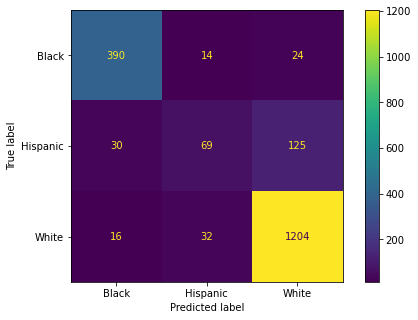

In [79]:
plot_confusion_matrix(log_pipe, X_test, y_test);

### Cros Validation

In [80]:
from sklearn.model_selection import cross_validate

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]

log_cv_model = Pipeline(steps=operations)

scores = cross_validate(log_cv_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.871662
train_accuracy           0.878424
test_precision_macro     0.822444
train_precision_macro    0.840535
test_recall_macro        0.720999
train_recall_macro       0.733288
test_f1_macro            0.745754
train_f1_macro           0.761034
dtype: float64

### Class Prediction

In [81]:
y_pred=log_pipe.predict(X_test)
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[6.52414556e-01, 2.71793993e-01, 7.57914506e-02],
       [2.61196741e-04, 5.86914823e-03, 9.93869655e-01],
       [4.94320329e-02, 1.66315769e-02, 9.33936390e-01],
       ...,
       [9.17158076e-01, 7.03758945e-02, 1.24660291e-02],
       [6.49924260e-03, 3.35148880e-01, 6.58351877e-01],
       [8.15724725e-04, 7.29127897e-02, 9.26271486e-01]])

In [82]:
test_data = pd.DataFrame(y_test)
test_data["pred"] = y_pred
test_data["pred_proba_Black"] = y_pred_proba[:,0]
test_data["pred_proba_Hispanic"] = y_pred_proba[:,1]
test_data["pred_proba_White"] = y_pred_proba[:,2]
test_data.sample(10)


,DODRace,pred,pred_proba_Black,pred_proba_Hispanic,pred_proba_White
2230,Black,Black,0.994140,0.001751,0.004109
1258,White,White,0.004191,0.051609,0.944200
5109,Black,Black,0.418023,0.301140,0.280837
225,White,Hispanic,0.063154,0.520484,0.416361
2878,White,White,0.000633,0.004686,0.994681
4230,Black,Black,0.684206,0.040592,0.275202
417,White,White,0.001864,0.099283,0.898853
3514,Hispanic,Hispanic,0.111083,0.639140,0.249778
245,Black,Black,0.848245,0.032053,0.119702
4925,White,White,0.010705,0.029394,0.959901


### Logistic Model GridsearchCV

In [83]:
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

In [84]:
penalty = ["l1", "l2", None]
C = [0.5, 0.6, 0.7, 0.8] 
class_weight= ["balanced", None]
solver = ["liblinear","lbfgs", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight":class_weight,
             "logistic__solver":solver
             }

In [85]:
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall_macro", cv=5, n_jobs=-1, return_train_score=True)
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoders',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 0.6, 0.7, 0.8],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2', None],
                         'logistic__solver': ['liblinear', 'lbfgs', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall_macro')

In [86]:
log_grid_model.best_params_

{'logistic__C': 0.6,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'saga'}

In [87]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 386   37    5]
 [  30  144   50]
 [  25  221 1006]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       428
    Hispanic       0.36      0.64      0.46       224
       White       0.95      0.80      0.87      1252

    accuracy                           0.81      1904
   macro avg       0.73      0.78      0.74      1904
weighted avg       0.86      0.81      0.83      1904


Train_Set
[[ 794   48   28]
 [  40  330   85]
 [  55  433 2052]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       870
    Hispanic       0.41      0.73      0.52       455
       White       0.95      0.81      0.87      2540

    accuracy                           0.82      3865
   macro avg       0.75      0.82      0.77      3865
weighted avg       0.87      0.82      0.84      3865



In [88]:
# Final Logistic model 

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.6, 
                                             class_weight="balanced",
                                             solver="saga"))]

log_final = Pipeline(steps=operations)
log_final.fit(X_train,y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [89]:
eval_metric(log_final, X_train, y_train, X_test, y_test)

Test_Set
[[ 386   37    5]
 [  30  144   50]
 [  25  221 1006]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       428
    Hispanic       0.36      0.64      0.46       224
       White       0.95      0.80      0.87      1252

    accuracy                           0.81      1904
   macro avg       0.73      0.78      0.74      1904
weighted avg       0.86      0.81      0.83      1904


Train_Set
[[ 794   48   28]
 [  40  330   85]
 [  55  433 2052]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       870
    Hispanic       0.41      0.73      0.52       455
       White       0.95      0.81      0.87      2540

    accuracy                           0.82      3865
   macro avg       0.75      0.82      0.77      3865
weighted avg       0.87      0.82      0.84      3865



**I see that "recall" scores getting higher. I can take it as the final model for the logistic model**

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

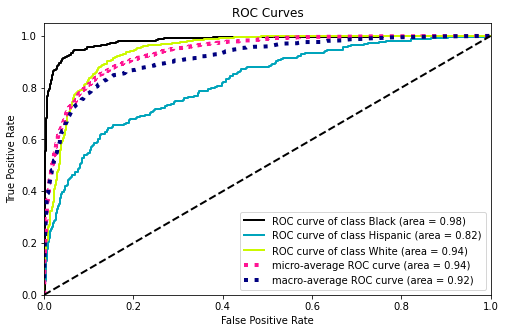

In [90]:
y_pred_proba = log_final.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [91]:
y_test_dummies = pd.get_dummies(y_test).values
roc_auc_score(y_test_dummies[:,0], y_pred_proba[:,0])

0.9820001646278144

In [92]:
roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])

0.8194887329931974

In [93]:
roc_auc_score(y_test_dummies[:,2], y_pred_proba[:,2])

0.9434205884082401

###  Precision Recall Curve
It would be correct to look at Precision Recall Curve as it is not a balanced data.

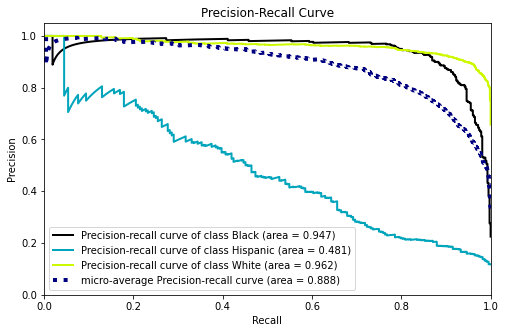

In [94]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [95]:
average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])

0.9467919482700643

In [96]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.48086455282535734

In [97]:
average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])

0.9623059023858265

### Final logistic model
firs grid search scores are better than second

In [98]:
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.6, 
                                             class_weight="balanced",
                                             solver="saga"))]

final_log_pipe = Pipeline(steps=operations)
final_log_pipe.fit(X_train,y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [99]:
eval_metric(final_log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 386   37    5]
 [  30  144   50]
 [  25  221 1006]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       428
    Hispanic       0.36      0.64      0.46       224
       White       0.95      0.80      0.87      1252

    accuracy                           0.81      1904
   macro avg       0.73      0.78      0.74      1904
weighted avg       0.86      0.81      0.83      1904


Train_Set
[[ 794   48   28]
 [  40  330   85]
 [  55  433 2052]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       870
    Hispanic       0.41      0.73      0.52       455
       White       0.95      0.81      0.87      2540

    accuracy                           0.82      3865
   macro avg       0.75      0.82      0.77      3865
weighted avg       0.87      0.82      0.84      3865



## 2. SVC

### Vanilla SVC model 

In [100]:
cat_ordinal = ["Gender", 'Component', 'Branch', 'WritingPreference']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC())]

svc_pipe = Pipeline(steps=operations)
svc_pipe.fit(X_train, y_train)
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 386    5   37]
 [  29   27  168]
 [  14    6 1232]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       428
    Hispanic       0.71      0.12      0.21       224
       White       0.86      0.98      0.92      1252

    accuracy                           0.86      1904
   macro avg       0.82      0.67      0.67      1904
weighted avg       0.85      0.86      0.83      1904


Train_Set
[[ 795    3   72]
 [  33   99  323]
 [  12   10 2518]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       870
    Hispanic       0.88      0.22      0.35       455
       White       0.86      0.99      0.92      2540

    accuracy                           0.88      3865
   macro avg       0.90      0.71      0.73      3865
weighted avg       0.89      0.88      0.86      3865



### Cros Validation

In [101]:
cat_ordinal = ["Gender", 'Component', 'Branch', 'WritingPreference']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("OneHotEncoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC())]

scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro']

svc_cv_model =  Pipeline(steps=operations)
scores = cross_validate(svc_cv_model, X_train, y_train, scoring = scoring, cv = 10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.853299
train_accuracy           0.881213
test_precision_macro     0.816740
train_precision_macro    0.906037
test_recall_macro        0.649122
train_recall_macro       0.700991
test_f1_macro            0.654725
train_f1_macro           0.725015
dtype: float64

###  SVC Model GridsearchCV

In [102]:
param_grid = {'SVC__C': [ 0.75, 1, 1.25],
              'SVC__gamma': ["scale"],
              'SVC__kernel': ['linear', 'poly', 'rbf'],
              'SVC__class_weight': ["balanced"],
              'SVC__degree': [2,3,4]
             }

operations = [("OneHotEncoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC())]
svc_grid_pipe = Pipeline(steps=operations)

svc_model_grid = GridSearchCV(svc_grid_pipe, param_grid, scoring="recall_macro", cv=10, n_jobs= -1,  return_train_score=True)
svc_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.75, 1, 1.25],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [2, 3, 4], 'SVC__gamma': ['scale'],
                         'SVC__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='recall_macro')

In [103]:
svc_model_grid.best_params_

{'SVC__C': 1,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [104]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 394   30    4]
 [  30  139   55]
 [  34  218 1000]]
              precision    recall  f1-score   support

       Black       0.86      0.92      0.89       428
    Hispanic       0.36      0.62      0.45       224
       White       0.94      0.80      0.87      1252

    accuracy                           0.81      1904
   macro avg       0.72      0.78      0.74      1904
weighted avg       0.86      0.81      0.82      1904


Train_Set
[[ 801   41   28]
 [  34  339   82]
 [  55  419 2066]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       870
    Hispanic       0.42      0.75      0.54       455
       White       0.95      0.81      0.88      2540

    accuracy                           0.83      3865
   macro avg       0.76      0.83      0.78      3865
weighted avg       0.88      0.83      0.84      3865



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [105]:
operations = [("OneHotEncoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC(gamma="scale", C=0.75,
                         kernel="linear", class_weight="balanced",
                         probability=True))]
final_svc_pipe = Pipeline(steps=operations)
final_svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=0.75, class_weight='balanced', kernel='linear',
                     probability=True))])

In [106]:
y_pred_proba = final_svc_pipe.decision_function(X_test)

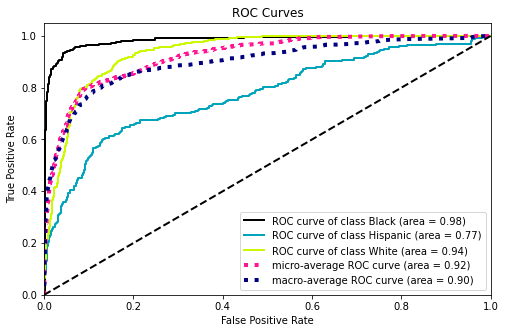

In [107]:
plot_roc(y_test, y_pred_proba)
plt.show();

In [108]:
print("Black")
y_test_dummies = pd.get_dummies(y_test).values
roc_auc_score(y_test_dummies[:,0], y_pred_proba[:,0])

Black


0.9838269001848897

In [109]:
print("Hispanic")
roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])

Hispanic


0.7741788903061223

In [110]:
print("White")
roc_auc_score(y_test_dummies[:,2], y_pred_proba[:,2])

White


0.9360985613202923

###  Precision Recall Curve
It would be correct to look at Precision Recall Curve as it is not a balanced data.

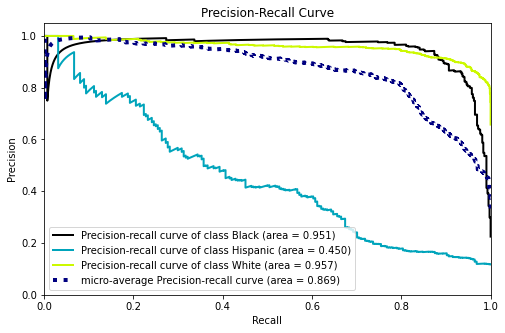

In [111]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [112]:
print("Black")
y_test_dummies = pd.get_dummies(y_test).values
roc_auc_score(y_test_dummies[:,0], y_pred_proba[:,0])

Black


0.9838269001848897

In [113]:
print("Hispanic")
roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])

Hispanic


0.7741788903061223

In [114]:
print("White")
roc_auc_score(y_test_dummies[:,2], y_pred_proba[:,2])

White


0.9360985613202923

## 3. RF

### Vanilla RF Model

In [115]:
cat_ordinal = ["Gender", 'Component', 'Branch', 'WritingPreference']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("RF_model", RandomForestClassifier())]

In [116]:
rf_pipe = Pipeline(steps=operations)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('RF_model', RandomForestClassifier())])

In [117]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 322    3  103]
 [  23   17  184]
 [  14    8 1230]]
              precision    recall  f1-score   support

       Black       0.90      0.75      0.82       428
    Hispanic       0.61      0.08      0.13       224
       White       0.81      0.98      0.89      1252

    accuracy                           0.82      1904
   macro avg       0.77      0.60      0.61      1904
weighted avg       0.81      0.82      0.78      1904


Train_Set
[[ 870    0    0]
 [   0  455    0]
 [   0    0 2540]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       870
    Hispanic       1.00      1.00      1.00       455
       White       1.00      1.00      1.00      2540

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



### Cros Validation

In [118]:
operations = [("Encoders", column_trans), ("RF_model", RandomForestClassifier())]

rf_cv_model = Pipeline(steps=operations)

scores = cross_validate(rf_cv_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy            0.809309
train_accuracy           1.000000
test_precision_micro     0.809309
train_precision_micro    1.000000
test_recall_micro        0.809309
train_recall_micro       1.000000
test_f1_micro            0.809309
train_f1_micro           1.000000
dtype: float64

### RF Model GridsearchCV

In [119]:
param_grid = {
             'RF_model__max_features':[50,70,90],
             'RF_model__max_depth':[3,5,7], 
             'RF_model__min_samples_split':[15,20,25],
             'RF_model__max_samples':[0.5, 0,8],
             'RF_model__n_estimators':[64, 128, 200]
                } 


operations = [("Encoders", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced"))]

rf_grid_pipe = Pipeline(steps=operations)

rf_model_grid = GridSearchCV(rf_grid_pipe, param_grid = param_grid , scoring="recall_macro",cv=10, n_jobs= -1, verbose = 1 )
rf_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoders',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [3, 5, 7],
                         'RF_model__max_features': [50, 70, 90],
                         'RF_model__max_samples': [0.5, 0, 8],
                         'RF_model__min_samples_split': [15, 20, 25],
                         'RF_model__n_estimators': [64, 128, 200]},
             scoring='recall_macro', verbose=1)

In [120]:
rf_model_grid.best_params_

{'RF_model__max_depth': 7,
 'RF_model__max_features': 70,
 'RF_model__max_samples': 0.5,
 'RF_model__min_samples_split': 25,
 'RF_model__n_estimators': 200}

In [121]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 357   22   49]
 [  32   97   95]
 [  69  158 1025]]
              precision    recall  f1-score   support

       Black       0.78      0.83      0.81       428
    Hispanic       0.35      0.43      0.39       224
       White       0.88      0.82      0.85      1252

    accuracy                           0.78      1904
   macro avg       0.67      0.70      0.68      1904
weighted avg       0.79      0.78      0.78      1904


Train_Set
[[ 765   23   82]
 [  26  324  105]
 [ 115  213 2212]]
              precision    recall  f1-score   support

       Black       0.84      0.88      0.86       870
    Hispanic       0.58      0.71      0.64       455
       White       0.92      0.87      0.90      2540

    accuracy                           0.85      3865
   macro avg       0.78      0.82      0.80      3865
weighted avg       0.86      0.85      0.86      3865



In [122]:
# final RF Model
operations = [("Encoders", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                  max_depth=7,
                                                  max_features= 50,
                                                  max_samples=0.5,
                                                  min_samples_split=25 ))]

final_rf_pipe = Pipeline(steps=operations)
final_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        max_features=50, max_samples=0.5,
                                        min_samples_split=25))])

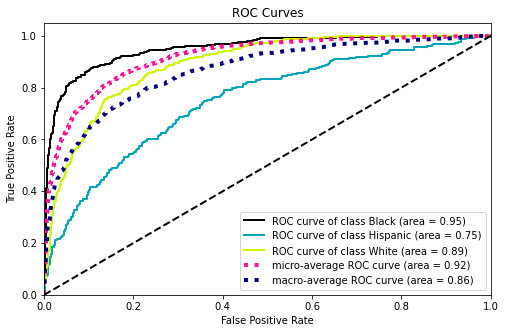

In [123]:
y_pred_proba = final_rf_pipe.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

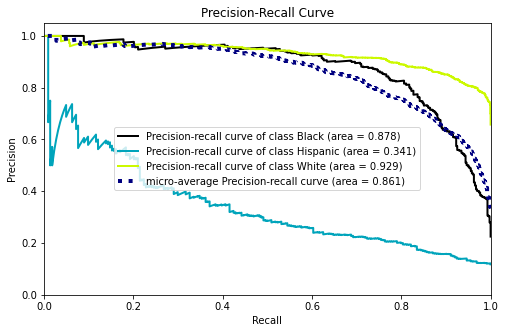

In [124]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [125]:
from xgboost import XGBClassifier

In [126]:
cat_ordinal = ["Gender", 'Component', 'Branch', 'WritingPreference']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier())]

In [127]:
xgb_pipe = Pipeline(steps=operations)

xgb_pipe.fit(X_train, y_train,)

[13:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [128]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 373   13   42]
 [  24   47  153]
 [  16   19 1217]]
              precision    recall  f1-score   support

       Black       0.90      0.87      0.89       428
    Hispanic       0.59      0.21      0.31       224
       White       0.86      0.97      0.91      1252

    accuracy                           0.86      1904
   macro avg       0.79      0.68      0.70      1904
weighted avg       0.84      0.86      0.84      1904


Train_Set
[[ 870    0    0]
 [   0  455    0]
 [   0    0 2540]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       870
    Hispanic       1.00      1.00      1.00       455
       White       1.00      1.00      1.00      2540

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



In [129]:
# balance the data
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50721785, 0.50721785, 0.50721785, ..., 1.48084291, 0.50721785,
       0.50721785])

In [131]:
df.groupby("label")["weights"].value_counts()

KeyError: 'label'

In [132]:
# Balanced vanilla model
cat_ordinal = ["Gender", 'Component', 'Branch', 'WritingPreference']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier())]

xgb_pipe = Pipeline(steps=operations)
xgb_pipe.fit(X_train,y_train, XGB_model__sample_weight = classes_weights )

[13:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [134]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 377   17   34]
 [  27   69  128]
 [  18   41 1193]]
              precision    recall  f1-score   support

       Black       0.89      0.88      0.89       428
    Hispanic       0.54      0.31      0.39       224
       White       0.88      0.95      0.92      1252

    accuracy                           0.86      1904
   macro avg       0.77      0.71      0.73      1904
weighted avg       0.84      0.86      0.85      1904


Train_Set
[[ 870    0    0]
 [   0  455    0]
 [   0    0 2540]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       870
    Hispanic       1.00      1.00      1.00       455
       White       1.00      1.00      1.00      2540

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



### Cross Validation

In [135]:
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier(eval_metric='mlogloss'))]

xgb_cv_model = Pipeline(steps=operations)

scores = cross_validate(xgb_cv_model, X_train, y_train,
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'],
                        cv = 10, return_train_score=True,
                       fit_params={"XGB_model__sample_weight":classes_weights})

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.845273
train_accuracy           1.000000
test_precision_macro     0.771093
train_precision_macro    1.000000
test_recall_macro        0.695691
train_recall_macro       1.000000
test_f1_macro            0.717050
train_f1_macro           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [136]:
param_grid = {
              "XGB_model__n_estimators":[20,40,60],
              'XGB_model__max_depth':[3,5,7], 
              "XGB_model__learning_rate": [0.05, 0.1, 0.2],
              "XGB_model__subsample":[0.5, 0.8], 
              "XGB_model__colsample_bytree":[0.5, 0.7, 0.9]
             }

In [137]:
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier())]

xgb_grid_model = Pipeline(steps=operations)

xgb_grid = GridSearchCV(xgb_grid_model, param_grid , scoring = "recall_macro", 
                        verbose=2, n_jobs = -1, 
                        return_train_score=True)

xgb_grid.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[13:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('Encoders',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,...
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 0.9],
                         'XGB_model__learning_rate': [0.05, 0.1, 0.2],
                         'XGB_model__max_depth': [3, 5, 7],
                         'XGB_model__n_estimators': [20, 40, 60],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='recall_macro', verbose=2)

In [138]:
xgb_grid.best_params_

{'XGB_model__colsample_bytree': 0.9,
 'XGB_model__learning_rate': 0.2,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 60,
 'XGB_model__subsample': 0.5}

In [139]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 380   33   15]
 [  39  122   63]
 [  40  207 1005]]
              precision    recall  f1-score   support

       Black       0.83      0.89      0.86       428
    Hispanic       0.34      0.54      0.42       224
       White       0.93      0.80      0.86      1252

    accuracy                           0.79      1904
   macro avg       0.70      0.75      0.71      1904
weighted avg       0.84      0.79      0.81      1904


Train_Set
[[ 824   16   30]
 [  17  394   44]
 [  68  282 2190]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       870
    Hispanic       0.57      0.87      0.69       455
       White       0.97      0.86      0.91      2540

    accuracy                           0.88      3865
   macro avg       0.81      0.89      0.84      3865
weighted avg       0.91      0.88      0.89      3865



In [196]:
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier( n_estimators= 60, 
                                          colsample_bytree = 0.9, 
                                          subsample= 0.5, 
                                          learning_rate = 0.2,
                                          max_depth= 3,
                                         eval_metric="logloss"))]

final_xgb_pipe = Pipeline(steps=operations)
final_xgb_pipe.fit(X_train,y_train, XGB_model__sample_weight = classes_weights )

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, enable_categorical=Fal...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=60,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=0.5,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [197]:
eval_metric(final_xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 373   39   16]
 [  31  128   65]
 [  36  193 1023]]
              precision    recall  f1-score   support

       Black       0.85      0.87      0.86       428
    Hispanic       0.36      0.57      0.44       224
       White       0.93      0.82      0.87      1252

    accuracy                           0.80      1904
   macro avg       0.71      0.75      0.72      1904
weighted avg       0.84      0.80      0.82      1904


Train_Set
[[ 827   16   27]
 [  18  397   40]
 [  65  298 2177]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       870
    Hispanic       0.56      0.87      0.68       455
       White       0.97      0.86      0.91      2540

    accuracy                           0.88      3865
   macro avg       0.81      0.89      0.84      3865
weighted avg       0.91      0.88      0.89      3865



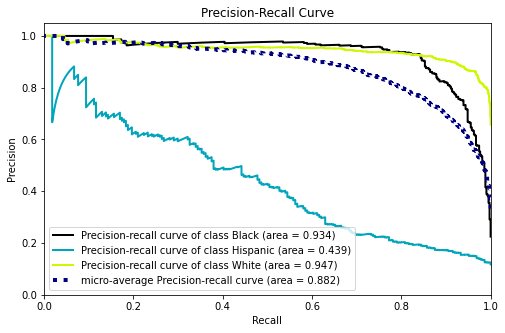

In [198]:
y_pred_proba = final_xgb_pipe.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show()

## Comparing Models

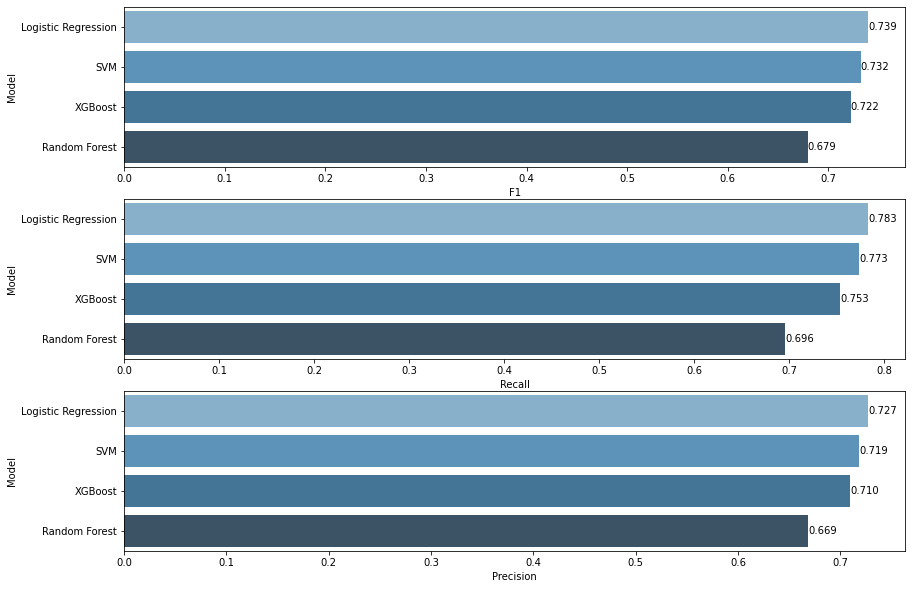

In [199]:
log_f1 = f1_score(y_test, final_log_pipe.predict(X_test), average='macro')
svc_f1 = f1_score(y_test, final_svc_pipe.predict(X_test), average='macro')
rf_f1 = f1_score(y_test, final_rf_pipe.predict(X_test), average='macro')
xgb_f1 = f1_score(y_test, final_xgb_pipe.predict(X_test), average='macro')

log_pre = precision_score(y_test, final_log_pipe.predict(X_test), average='macro')
svc_pre = precision_score(y_test, final_svc_pipe.predict(X_test), average='macro')
rf_pre = precision_score(y_test, final_rf_pipe.predict(X_test), average='macro')
xgb_pre = precision_score(y_test, final_xgb_pipe.predict(X_test), average='macro')

log_rec = recall_score(y_test, final_log_pipe.predict(X_test), average='macro')
svc_rec = recall_score(y_test, final_svc_pipe.predict(X_test), average='macro')
rf_rec = recall_score(y_test, final_rf_pipe.predict(X_test), average='macro')
xgb_rec = recall_score(y_test, final_xgb_pipe.predict(X_test), average='macro')

compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1, svc_f1, rf_f1, xgb_f1],
                        "Precision" : [log_pre, svc_pre, rf_pre, xgb_pre],
                        "Recall": [log_rec, svc_rec, rf_rec, xgb_rec],
                        })

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [193]:
# Logistic Model get the best scores

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [184]:
#!pip install imblearn

In [200]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [148]:
cat_onehot = ["Gender", 'Component', 'Branch', 'WritingPreference']

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       remainder=MinMaxScaler())

In [149]:
over = SMOTE(sampling_strategy={"Hispanic": 800})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [150]:
operations = [("Encoders",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000, random_state=101))] 

In [151]:
smote_pipeline = imbpipeline(steps=operations)

In [152]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 800})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [153]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[ 383   24   21]
 [  27   96  101]
 [  16   59 1177]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       428
    Hispanic       0.54      0.43      0.48       224
       White       0.91      0.94      0.92      1252

    accuracy                           0.87      1904
   macro avg       0.78      0.75      0.77      1904
weighted avg       0.86      0.87      0.86      1904


Train_Set
[[ 779   24   67]
 [  36  234  185]
 [  32  113 2395]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       870
    Hispanic       0.63      0.51      0.57       455
       White       0.90      0.94      0.92      2540

    accuracy                           0.88      3865
   macro avg       0.82      0.78      0.80      3865
weighted avg       0.88      0.88      0.88      3865



In [154]:
operations = [("Encoders",column_trans), 
              ("log", LogisticRegression(max_iter=10000, random_state=101))] 

model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], 
                        cv = 10, return_train_score=True,
                       error_score='raise')
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.871922
train_accuracy           0.879086
test_precision_macro     0.824414
train_precision_macro    0.841577
test_recall_macro        0.723284
train_recall_macro       0.734945
test_f1_macro            0.748553
train_f1_macro           0.762789
dtype: float64

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [187]:
from sklearn.metrics import matthews_corrcoef

y_pred = smote_pipeline.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.7353617404656373

In [188]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7341925779816307

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [157]:
#!pip install shap

In [158]:
import shap

In [159]:
final_log_pipe

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [160]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(max_iter=10000,C=0.6, 
                                class_weight='balanced', 
                                penalty='l1', solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='saga')

In [161]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[ 385   37    6]
 [  32  142   50]
 [  27  214 1011]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.88       428
    Hispanic       0.36      0.63      0.46       224
       White       0.95      0.81      0.87      1252

    accuracy                           0.81      1904
   macro avg       0.73      0.78      0.74      1904
weighted avg       0.86      0.81      0.83      1904


Train_Set
[[ 795   49   26]
 [  40  331   84]
 [  57  430 2053]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       870
    Hispanic       0.41      0.73      0.52       455
       White       0.95      0.81      0.87      2540

    accuracy                           0.82      3865
   macro avg       0.75      0.82      0.77      3865
weighted avg       0.87      0.82      0.84      3865



In [162]:
model = LogisticRegression(max_iter=10000,C=0.6, 
                                class_weight='balanced', 
                                penalty='l1', solver='saga')

scores = cross_validate(model, X_train_trans, y_train, 
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))

In [163]:
df_scores.mean()[2:]

test_accuracy            0.807245
train_accuracy           0.820763
test_precision_macro     0.733932
train_precision_macro    0.748883
test_recall_macro        0.796067
train_recall_macro       0.817139
test_f1_macro            0.747450
train_f1_macro           0.765554
dtype: float64

In [164]:
features = column_trans_shap.get_feature_names_out()
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Component_Army National Guard',
       'onehotencoder__Component_Army Reserve',
       'onehotencoder__Component_Regular Army',
       'onehotencoder__Branch_Combat Arms',
       'onehotencoder__Branch_Combat Service Support',
       'onehotencoder__Branch_Combat Support',
       'onehotencoder__WritingPreference_Either hand (No preference)',
       'onehotencoder__WritingPreference_Left hand',
       'onehotencoder__WritingPreference_Right hand',
       'remainder__abdominalextensiondepthsitting',
       'remainder__acromialheight', 'remainder__acromionradialelength',
       'remainder__anklecircumference', 'remainder__axillaheight',
       'remainder__balloffootcircumference',
       'remainder__balloffootlength', 'remainder__biacromialbreadth',
       'remainder__bicepscircumferenceflexed',
       'remainder__bicristalbreadth', 'remainder__bideltoidbreadth',
       'remainder__bimalleolarbrea

In [165]:
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]
new_features

['Gender_Female',
 'Gender_Male',
 'Component_Army National Guard',
 'Component_Army Reserve',
 'Component_Regular Army',
 'Branch_Combat Arms',
 'Branch_Combat Service Support',
 'Branch_Combat Support',
 'WritingPreference_Either hand (No preference)',
 'WritingPreference_Left hand',
 'WritingPreference_Right hand',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'ear

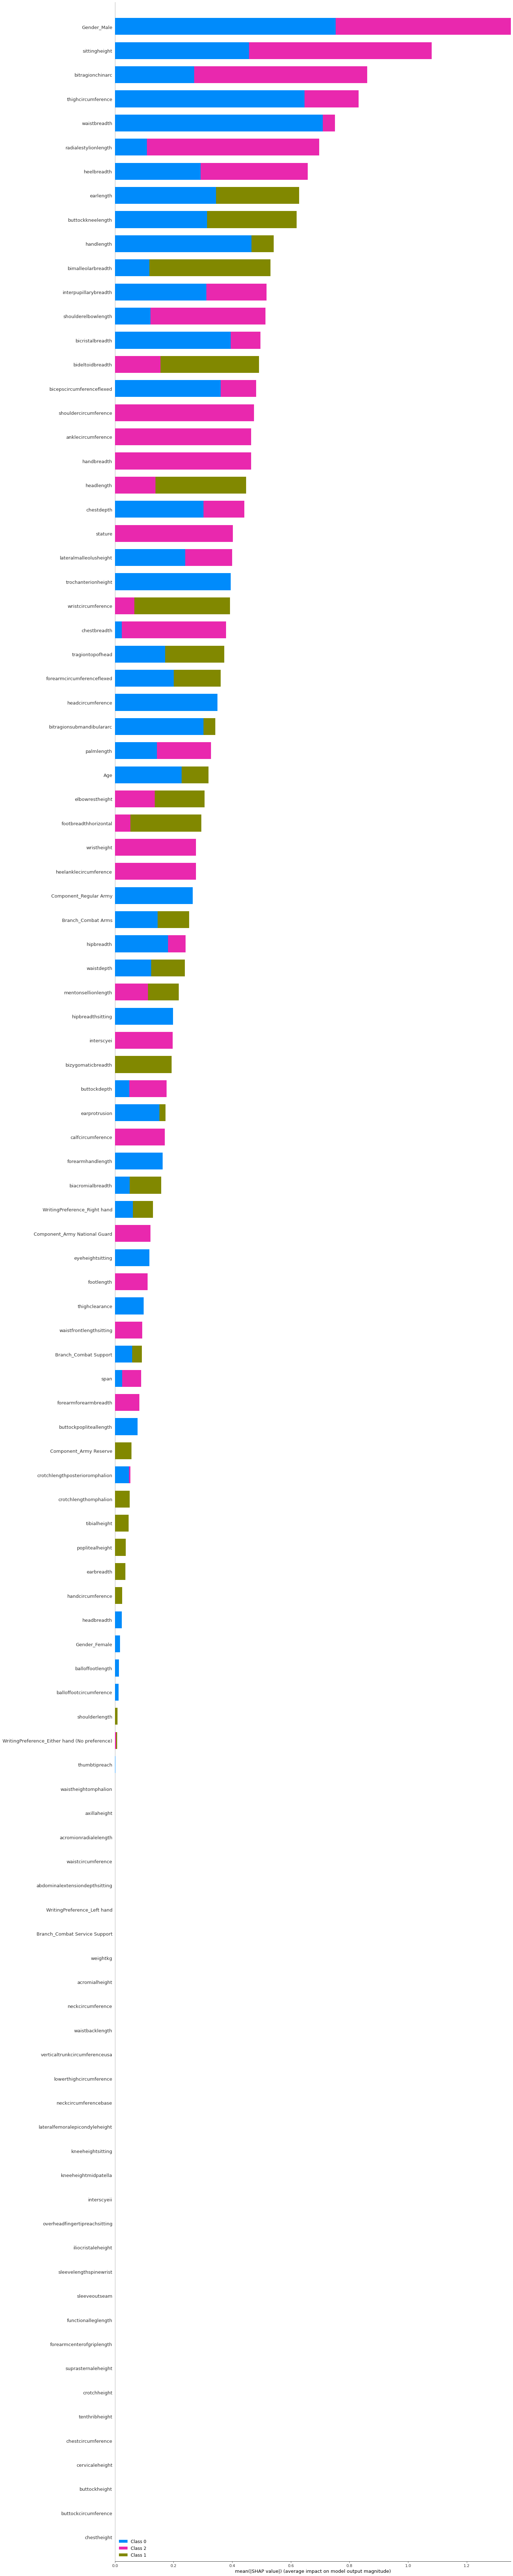

In [166]:
explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100) )

In [167]:
columns = ['earlength', 'buttockkneelength', 'bimalleolarbreadth', 'bideltoidbreadth', 'headlength', 'tragiontopofhead', 
'forearmcircumferenceflexed', 'elbowrestheight',  'mentonsellionlength', 'WritingPreference', 'Gender', 'headbreadth',
'lateralmalleolusheight', 'chestdepth', 'interpupillarybreadth']

In [168]:
df_snap = df[columns]
df_snap.head()

,earlength,buttockkneelength,bimalleolarbreadth,bideltoidbreadth,headlength,tragiontopofhead,forearmcircumferenceflexed,elbowrestheight,mentonsellionlength,WritingPreference,Gender,headbreadth,lateralmalleolusheight,chestdepth,interpupillarybreadth
0,65,587,65,466,191,110,265,220,118,Right hand,Female,141,55,245,645
1,60,583,64,430,180,125,247,208,115,Right hand,Female,138,69,206,595
2,65,583,69,450,207,129,262,204,135,Right hand,Female,146,64,223,655
3,62,599,68,484,206,125,309,244,118,Right hand,Female,153,67,285,655
4,65,607,67,525,181,116,260,233,114,Right hand,Female,140,63,290,635


In [169]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_snap, y, test_size=0.3, random_state=101, stratify =y)

In [170]:
cat_new = df_snap.select_dtypes("object").columns
cat_new

Index(['WritingPreference', 'Gender'], dtype='object')

In [171]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.6, 
                                             class_weight="balanced",
                                             solver="saga"))]

snap_log_pipe = Pipeline(steps=operations)
snap_log_pipe.fit(X_train2,y_train2)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['WritingPreference', 'Gender'], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [172]:
eval_metric(snap_log_pipe, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[321  36  32]
 [ 27 122  55]
 [139 331 668]]
              precision    recall  f1-score   support

       Black       0.66      0.83      0.73       389
    Hispanic       0.25      0.60      0.35       204
       White       0.88      0.59      0.71      1138

    accuracy                           0.64      1731
   macro avg       0.60      0.67      0.60      1731
weighted avg       0.76      0.64      0.67      1731


Train_Set
[[ 735   68  106]
 [  49  303  123]
 [ 355  688 1611]]
              precision    recall  f1-score   support

       Black       0.65      0.81      0.72       909
    Hispanic       0.29      0.64      0.40       475
       White       0.88      0.61      0.72      2654

    accuracy                           0.66      4038
   macro avg       0.60      0.68      0.61      4038
weighted avg       0.75      0.66      0.68      4038



In [173]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, 
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy            0.651561
train_accuracy           0.657194
test_precision_macro     0.598501
train_precision_macro    0.603083
test_recall_macro        0.677816
train_recall_macro       0.685379
test_f1_macro            0.604628
train_f1_macro           0.610915
dtype: float64

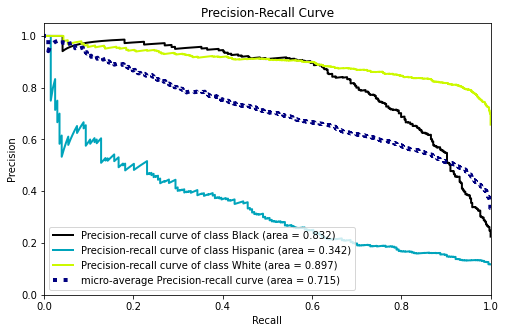

In [174]:
model = Pipeline(steps=operations)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [175]:
cat_onehot = ['Gender', 'Component', 'Branch', 'WritingPreference']
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.6, 
                                             class_weight="balanced",
                                             solver="saga"))]

final_model = Pipeline(steps=operations)
final_model.fit(X_train,y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [176]:
import pickle
pickle.dump(final_model, open("final_model", 'wb'))

In [177]:
race_model = pickle.load(open("final_model", "rb"))

In [192]:
df.describe(include="all").loc["mean"]

abdominalextensiondepthsitting      247.25429
acromialheight                    1408.630265
acromionradialelength               328.07159
anklecircumference                 225.201768
axillaheight                      1301.902583
balloffootcircumference            244.408043
balloffootlength                   195.118911
biacromialbreadth                  399.706015
bicepscircumferenceflexed          341.663027
bicristalbreadth                   274.903449
bideltoidbreadth                   491.454845
bimalleolarbreadth                  72.335413
bitragionchinarc                   324.962212
bitragionsubmandibulararc           306.67776
bizygomaticbreadth                 139.529381
buttockcircumference              1022.059456
buttockdepth                       242.234356
buttockheight                      872.112845
buttockkneelength                  610.449991
buttockpopliteallength             498.331773
calfcircumference                  386.316519
cervicaleheight                   

In [179]:
sample =pd.DataFrame(data=df.describe(include="all").loc["mean"].values,
            index=df.describe(include="all").loc["mean"].index).T
sample

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,DODRace,Age,WritingPreference
0,247.25429,1408.630265,328.07159,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.67776,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.17542,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.66164,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.66528,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.75767,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.40995,916.817126,230.459178,377.352054,1033.59109,80.098111,169.308372,831.334547,NaN,NaN,NaN,NaN,29.776391,NaN


In [180]:
sample["Gender"] = "Female"
sample["Component"] = "Regular Army"
sample["Branch"] = "Combat Support"
sample["WritingPreference"]  = "Right hand"
sample.drop("DODRace", axis=1, inplace=True)

In [181]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [182]:
predictions

array(['Black'], dtype=object)

In [183]:
predictions_proba

array([[0.50966348, 0.30323046, 0.18710606]])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___